# Parkinson’s Disease Prediction Project

### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

### 2. Load the Data

In [ ]:
# Parkinson’s Project
# Our choice: Predict total_UPDRS (Parkinson’s severity) from voice features
# Data: Oxford Parkinson’s Telemonitoring Dataset.

In [2]:
df = pd.read_csv("/Users/ZINA/Desktop/IRONHACK/Week_7/parkinsons/telemonitoring/parkinsons_updrs.data")

# Inspect the data
print(df.head())
print(df.info())
print(df.describe())

# Check missing values
print(df.isna().sum())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

### 3. Select Features and Target

In [ ]:
# Target (y): total_UPDRS
# Features (X): all voice features

In [3]:
voice_features = ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
    'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
    'Shimmer:APQ11', 'Shimmer:DDA',
    'NHR', 'HNR',
    'RPDE', 'DFA', 'PPE']

X = df[voice_features]
y = df['total_UPDRS']

### 4. Exploratory Data Analysis

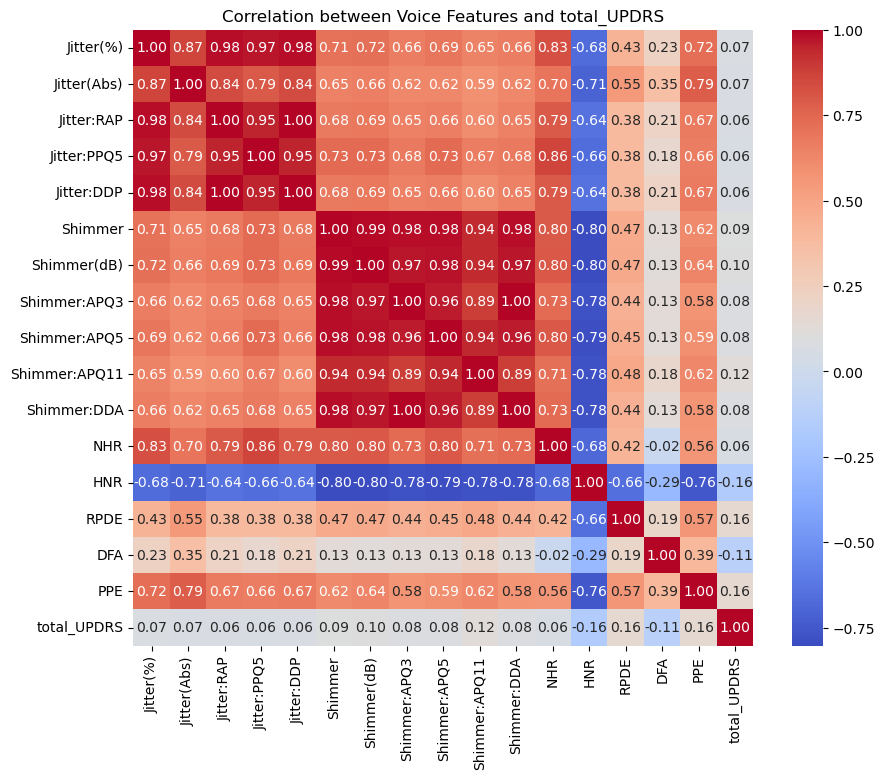

In [4]:
# Correlation Matrix
corr = df[voice_features + ['total_UPDRS']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between Voice Features and total_UPDRS")
plt.show()

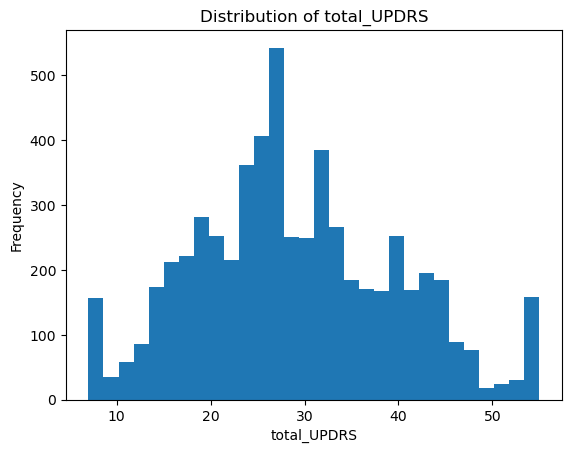

In [5]:
# Histogram of Target
plt.hist(y, bins=30)
plt.xlabel("total_UPDRS")
plt.ylabel("Frequency")
plt.title("Distribution of total_UPDRS")
plt.show()

### 5. Split data into training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 6. Train Linear Regression model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 7. Evaluate the model

In [8]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R²:", r2)

MAE: 8.27068909643364
R²: 0.07898925175899019


In [ ]:
# MAE: How far predictions are from actual values on average
# the model predicts severity within 8 points on average
# R²: How much variance in total_UPDRS the model explains
# R² of 0.08 predictions are limited by the complexity and variability of Parkinson’s disease

### 8. Visualize Results

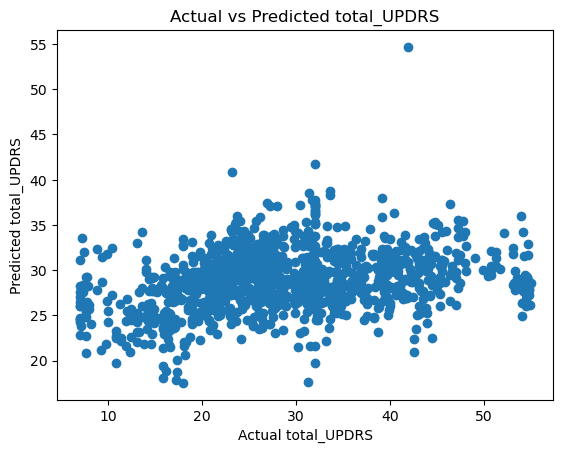

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual total_UPDRS")
plt.ylabel("Predicted total_UPDRS")
plt.title("Actual vs Predicted total_UPDRS")
plt.show()

### Advanced Modeling: Random Forest Regressor

In [10]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

In [11]:
# Train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [12]:
# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", rf_mae)
print("Random Forest R²:", rf_r2)

Random Forest MAE: 6.593036261276595
Random Forest R²: 0.3539183487114581


In [ ]:
# MAE = 6.59: On average, the model’s predictions are about 6–7 UPDRS points off
# R2 = 0.35: measures how much of the total variation in disease severity can be explained by voice features alone.
# Voice ≠ whole disease